### Introduction to Text Generation
This notebook explains how we can split a given corpus of data info features and labels and then train a neural network to predict the next word in a sentence

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-GRAM sequence for each sequence of the corpus
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels

In [1]:
## import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

c:\Users\soyvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.15.0


### Step 1: Create a corpus

In [2]:
data = "ince we set return_sequences=True in the LSTM layers, the output is now a three-dimension vector. If we input that into the Dense layer, it will raise an error because the Dense layer only accepts two-dimension input. In order to input a three-dimension vector, we need to use a wrapper layer called TimeDistributed. This layer will help us maintain output’s shape, so that we can achieve a sequence as output in the end."

In [3]:
## instantiate tokenizer
tokenizer = Tokenizer()

## create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split(".")
print(corpus)

['ince we set return_sequences=true in the lstm layers, the output is now a three-dimension vector', ' if we input that into the dense layer, it will raise an error because the dense layer only accepts two-dimension input', ' in order to input a three-dimension vector, we need to use a wrapper layer called timedistributed', ' this layer will help us maintain output’s shape, so that we can achieve a sequence as output in the end', '']


### Step 2: Train the tokenizer and create word encoding dictionary

In [4]:
tokenizer.fit_on_texts(corpus)

# calculate vocabulary size + 1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'we': 2, 'a': 3, 'layer': 4, 'in': 5, 'dimension': 6, 'input': 7, 'output': 8, 'three': 9, 'vector': 10, 'that': 11, 'dense': 12, 'will': 13, 'to': 14, 'ince': 15, 'set': 16, 'return': 17, 'sequences': 18, 'true': 19, 'lstm': 20, 'layers': 21, 'is': 22, 'now': 23, 'if': 24, 'into': 25, 'it': 26, 'raise': 27, 'an': 28, 'error': 29, 'because': 30, 'only': 31, 'accepts': 32, 'two': 33, 'order': 34, 'need': 35, 'use': 36, 'wrapper': 37, 'called': 38, 'timedistributed': 39, 'this': 40, 'help': 41, 'us': 42, 'maintain': 43, 'output’s': 44, 'shape': 45, 'so': 46, 'can': 47, 'achieve': 48, 'sequence': 49, 'as': 50, 'end': 51}
52


In [5]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8, 22, 23, 3, 9, 6, 10]

### Step 3: Create N-gram sequence

In [6]:
## create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0] # get all the tokens of the sequence
    for i in range(1, len(tokens)): # create n-gram sequences
        n_gram_sequence = tokens[: i+ 1]
        input_sequences.append(n_gram_sequence)

In [7]:
print(input_sequences)

[[15, 2], [15, 2, 16], [15, 2, 16, 17], [15, 2, 16, 17, 18], [15, 2, 16, 17, 18, 19], [15, 2, 16, 17, 18, 19, 5], [15, 2, 16, 17, 18, 19, 5, 1], [15, 2, 16, 17, 18, 19, 5, 1, 20], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8, 22], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8, 22, 23], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8, 22, 23, 3], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8, 22, 23, 3, 9], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8, 22, 23, 3, 9, 6], [15, 2, 16, 17, 18, 19, 5, 1, 20, 21, 1, 8, 22, 23, 3, 9, 6, 10], [24, 2], [24, 2, 7], [24, 2, 7, 11], [24, 2, 7, 11, 25], [24, 2, 7, 11, 25, 1], [24, 2, 7, 11, 25, 1, 12], [24, 2, 7, 11, 25, 1, 12, 4], [24, 2, 7, 11, 25, 1, 12, 4, 26], [24, 2, 7, 11, 25, 1, 12, 4, 26, 13], [24, 2, 7, 11, 25, 1, 12, 4, 26, 13, 27], [24, 2, 7, 11, 25, 1, 12, 4, 26, 13, 27, 28], [24, 2, 7, 11, 25, 1, 12, 4, 26, 13, 27, 28, 29], [2

In [8]:
## pad sequences
max_seq_array = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences, maxlen=max_seq_array, padding='pre'))

In [9]:
input_seq_array

array([[ 0,  0,  0, ...,  0, 15,  2],
       [ 0,  0,  0, ..., 15,  2, 16],
       [ 0,  0,  0, ...,  2, 16, 17],
       ...,
       [ 0,  0,  0, ..., 50,  8,  5],
       [ 0,  0,  0, ...,  8,  5,  1],
       [ 0,  0, 40, ...,  5,  1, 51]])

### Step 4 Extract features and labels

In [10]:
# creating features(x) and label(y)
x = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]
print(x, labels)
# one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

[[ 0  0  0 ...  0  0 15]
 [ 0  0  0 ...  0 15  2]
 [ 0  0  0 ... 15  2 16]
 ...
 [ 0  0  0 ... 49 50  8]
 [ 0  0  0 ... 50  8  5]
 [ 0  0 40 ...  8  5  1]] [ 2 16 17 18 19  5  1 20 21  1  8 22 23  3  9  6 10  2  7 11 25  1 12  4
 26 13 27 28 29 30  1 12  4 31 32 33  6  7 34 14  7  3  9  6 10  2 35 14
 36  3 37  4 38 39  4 13 41 42 43 44 45 46 11  2 47 48  3 49 50  8  5  1
 51]


In [11]:
print(tokenizer.word_index)
print(x[2])
print(y[2])

{'the': 1, 'we': 2, 'a': 3, 'layer': 4, 'in': 5, 'dimension': 6, 'input': 7, 'output': 8, 'three': 9, 'vector': 10, 'that': 11, 'dense': 12, 'will': 13, 'to': 14, 'ince': 15, 'set': 16, 'return': 17, 'sequences': 18, 'true': 19, 'lstm': 20, 'layers': 21, 'is': 22, 'now': 23, 'if': 24, 'into': 25, 'it': 26, 'raise': 27, 'an': 28, 'error': 29, 'because': 30, 'only': 31, 'accepts': 32, 'two': 33, 'order': 34, 'need': 35, 'use': 36, 'wrapper': 37, 'called': 38, 'timedistributed': 39, 'this': 40, 'help': 41, 'us': 42, 'maintain': 43, 'output’s': 44, 'shape': 45, 'so': 46, 'can': 47, 'achieve': 48, 'sequence': 49, 'as': 50, 'end': 51}
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  2 16]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### Define the LSTM model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length = max_seq_array - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(x, y, epochs=500, verbose=1)



Epoch 1/500


3/3 [==============================] - 16s 74ms/step - loss: 3.9507 - accuracy: 0.0274
Epoch 2/500
3/3 [==============================] - 0s 42ms/step - loss: 3.9402 - accuracy: 0.0548
Epoch 3/500
3/3 [==============================] - 0s 49ms/step - loss: 3.9317 - accuracy: 0.0548
Epoch 4/500
3/3 [==============================] - 0s 34ms/step - loss: 3.9223 - accuracy: 0.0548
Epoch 5/500
3/3 [==============================] - 0s 26ms/step - loss: 3.9118 - accuracy: 0.0548
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 3.9002 - accuracy: 0.0548
Epoch 7/500
3/3 [==============================] - 0s 24ms/step - loss: 3.8863 - accuracy: 0.0548
Epoch 8/500
3/3 [==============================] - 0s 34ms/step - loss: 3.8670 - accuracy: 0.0548
Epoch 9/500
3/3 [==============================] - 0s 25ms/step - loss: 3.8465 - accuracy: 0.0548
Epoch 10/500
3/3 [==============================] - 0s 32ms/step - loss: 3.8188 - accuracy: 0.0548
Epoch 11/500
3

### Visualize metrics

In [13]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.show()

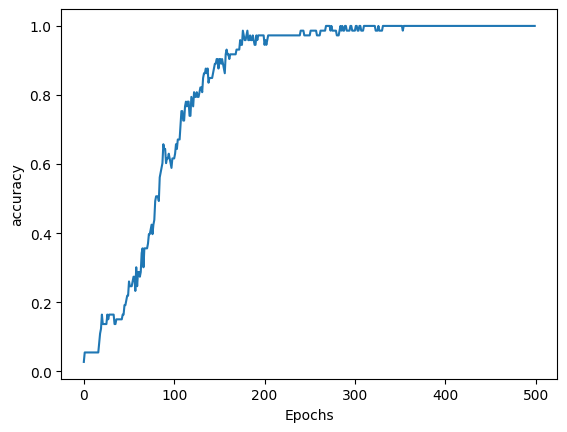

In [14]:
plot_metric(history=history, metric='accuracy')

### Generate new text

In [15]:
print(tokenizer.word_index)

{'the': 1, 'we': 2, 'a': 3, 'layer': 4, 'in': 5, 'dimension': 6, 'input': 7, 'output': 8, 'three': 9, 'vector': 10, 'that': 11, 'dense': 12, 'will': 13, 'to': 14, 'ince': 15, 'set': 16, 'return': 17, 'sequences': 18, 'true': 19, 'lstm': 20, 'layers': 21, 'is': 22, 'now': 23, 'if': 24, 'into': 25, 'it': 26, 'raise': 27, 'an': 28, 'error': 29, 'because': 30, 'only': 31, 'accepts': 32, 'two': 33, 'order': 34, 'need': 35, 'use': 36, 'wrapper': 37, 'called': 38, 'timedistributed': 39, 'this': 40, 'help': 41, 'us': 42, 'maintain': 43, 'output’s': 44, 'shape': 45, 'so': 46, 'can': 47, 'achieve': 48, 'sequence': 49, 'as': 50, 'end': 51}


In [16]:
seed_text = "It was a cold night"

tokenlist = tokenizer.texts_to_sequences([seed_text])
token_pad = pad_sequences(tokenlist, maxlen=max_seq_array - 1, padding='pre')
predictd = model.predict(token_pad, verbose=0)
print(np.max(predictd), np.argmax(predictd, axis=-1))

0.9079362 [7]


In [17]:
print(data)

ince we set return_sequences=True in the LSTM layers, the output is now a three-dimension vector. If we input that into the Dense layer, it will raise an error because the Dense layer only accepts two-dimension input. In order to input a three-dimension vector, we need to use a wrapper layer called TimeDistributed. This layer will help us maintain output’s shape, so that we can achieve a sequence as output in the end.


In [18]:
seed_text = "lstm"

## add number of words you want to predict
next_words = 20

## run the loop to predict and concatenate the word

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_array - 1, padding='pre')
    print(token_list)
    # predict the class using the trained model
    predicted = model.predict(token_list, verbose=0)
    higest_prediction = np.argmax(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        # reference the predicted class with the vocabulary
        if index == higest_prediction:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20]]


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  7]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  7  7]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  7  7  3]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  7  7  3  9]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  7  7  3  9  6]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  7  7  3  9  6 10]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  7  7  3  9  6 10  2]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0 20  7  7  3  9  6 10  2 35]]
[[ 0  0  0  0  0  0  0  0  0  0  0 20  7  7  3  9  6 10  2 35 14]]
[[ 0  0  0  0  0  0  0  0  0  0 20  7  7  3  9  6 10  2 35 14 36]]
[[ 0  0  0  0  0  0  0  0  0 20  7  7  3  9  6 10  2 35 14 36  3]]
[[ 0  0  0  0  0  0  0  0 20  7  7  3  9  6 10  2 35 14 36  3 37]]
[[ 0  0  0  0  0  0  0 20  7  7  3  9  6 10  2 35 14 36  3 37  4]]
[[ 0  0  0  0  0  0 20  7  7  3  9  6 10  2 35 14 36  3 37  4 38]]
[[ 0  0  0  0  0 20  7  7  3  9  6 10  2 35 14 36  3 37  4 38 